<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥INDUSTRY EQUIPMENT DEFECT DECTECION USING CNN🔥🔥
</div>


![](https://news.engin.umich.edu/wp-content/uploads/2023/06/Dislocations-feature.jpg)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥IMPORTING LIBRARIES🔥🔥
</div>


In [3]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import kerastuner as kt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.calibration import calibration_curve
from keras.callbacks import EarlyStopping
from keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📂 Libraries:</b> Successfully import the recquired library
</div>


<div style="color:white; background-color:#FF5733; padding: 15px; border-radius: 10px; font-size: 150%; font-family: Arial, sans-serif; text-align:center; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
   🌟🌟 DATA PREPROCESSING 🌟🌟
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥BASE_PATH AND FOLDERS READING🔥🔥
</div>


In [2]:
base_path = "/kaggle/input/industrial-images-dataset/Industrial-Equipment/"

In [4]:
defected_path = os.path.join(base_path, "Defected")
non_defected_path = os.path.join(base_path, "Non-Defected")

In [5]:
def load_and_resize_images(folder_path, label, target_size=(100, 100), grayscale=True):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith(".png") or filename.endswith(".jpeg"):
            try:
                image = Image.open(os.path.join(folder_path, filename))
                # Resize the image to the target size
                image_resized = image.resize(target_size)
                # Convert the image to grayscale if specified
                if grayscale:
                    image_resized = image_resized.convert('L')
                # Convert the image to a numpy array
                image_array = np.array(image_resized)
                # Add the image and label to the lists
                images.append(image_array)
                labels.append(label)
            except Exception as e:
                print(f"Error processing {filename}: {str(e)}")
    return images, labels


In [6]:
# Load and resize images from Defected folder
defected_images, defected_labels = load_and_resize_images(defected_path, label=0)

# Load and resize images from Non-Defected folder
non_defected_images, non_defected_labels = load_and_resize_images(non_defected_path, label=1)

# Check the number of images in each category
print("Number of defected images:", len(defected_images))
print("Number of non-defected images:", len(non_defected_images))


Number of defected images: 3542
Number of non-defected images: 3348


In [7]:
# Concatenate defected and non-defected images and labels
image_data = np.concatenate((defected_images, non_defected_images), axis=0)
label_data = np.concatenate((defected_labels, non_defected_labels), axis=0)

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📌 Dataset Path:</b> Successfully fetch the Dataset 
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥DATA SHUFFLING🔥🔥
</div>


In [8]:
combined_data = list(zip(image_data, label_data))
np.random.shuffle(combined_data)
shuffled_image_data, shuffled_label_data = zip(*combined_data)

# Convert to NumPy arrays
shuffled_image_data = np.array(shuffled_image_data)
shuffled_label_data = np.array(shuffled_label_data)

# Check the shape of the shuffled data
print("Shuffled image data shape:", shuffled_image_data.shape)
print("Shuffled label data shape:", shuffled_label_data.shape)

Shuffled image data shape: (6890, 100, 100)
Shuffled label data shape: (6890,)


<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📌 Shuffling:</b> Successfully shuffle the Dataset for better training
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥TRAIN-TEST-SPLIT🔥🔥
</div>


In [9]:
train_images, val_images, train_labels, val_labels = train_test_split(shuffled_image_data, shuffled_label_data, test_size=0.2, random_state=42)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥NORMALIZAION🔥🔥
</div>


In [10]:
train_images = train_images / 255.0
val_images = val_images / 255.0

<div style="color:white; background-color:#FF5733; padding: 15px; border-radius: 10px; font-size: 150%; font-family: Arial, sans-serif; text-align:center; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
   🌟🌟 MODEL TRAINING 🌟🌟
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥CNN MODEL ARCHITECTURE🔥🔥
</div>


![](https://de.mathworks.com/company/technical-articles/4-proven-applications-for-your-ai-algorithms/_jcr_content/mainParsys/image_0_copy_copy_co_1636054165.adapt.full.medium.jpg/1669738695805.jpg)

In [22]:
def build_model(hp):
    model = keras.Sequential()
    
    # Tune the number of convolutional layers
    num_conv_layers = hp.Int('num_conv_layers', min_value=1, max_value=3, step=1)
    for i in range(num_conv_layers):
        model.add(layers.Conv2D(filters=hp.Int(f'conv_{i}_filter', min_value=32, max_value=128, step=32),
                                kernel_size=(3, 3),
                                padding='same',
                                activation='relu',
                                input_shape=(100, 100, 1)))  
        model.add(layers.MaxPool2D(pool_size=(2, 2)))
    
    model.add(layers.Flatten())
    
    # Tune the number of dense layers
    num_dense_layers = hp.Int('num_dense_layers', min_value=1, max_value=3, step=1)
    for i in range(num_dense_layers):
        model.add(layers.Dense(units=hp.Int(f'dense_{i}_unit', min_value=32, max_value=512, step=32),
                                activation='relu'))
        model.add(layers.Dropout(rate=hp.Float(f'dropout_{i}_rate', min_value=0.1, max_value=0.5, step=0.1)))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.binary_crossentropy,
                  metrics=['accuracy'])
    return model


In [23]:
tuner = kt.RandomSearch(build_model,
                         objective='val_accuracy',
                         max_trials=5,
                         directory='/kaggle/working/',
                         project_name='Industry-Defect-1')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [24]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥HYPERTUNING🔥🔥
</div>


In [25]:
tuner.search(train_images, train_labels, epochs=100, validation_data=(val_images, val_labels), callbacks=[early_stopping])

Trial 5 Complete [00h 00m 35s]
val_accuracy: 0.5174165368080139

Best val_accuracy So Far: 0.9571843147277832
Total elapsed time: 00h 05m 16s


<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📌 Hypertuning:</b> Successfully hypertune the CNN model
</div>


<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: skyblue;">
<b>🔍 Information:</b> 
    
1. We get best val_accuracy after hypertuning is -> 95.71%.
    
</div>

In [26]:
# Get the best hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📌 Best parameters:</b> Successfully fetch the best parameter.
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥MODEL SUMMARY🔥🔥
</div>


In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 100, 100, 96)   │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 50, 50, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 50, 50, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 25, 25, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 32)     │        27,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 160)            │        41,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,332,865 (5.08 MB)

 Trainable params: 1,332,865 (5.08 MB)

 Non-trainable params: 0 (0.00 B)

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: skyblue;">
<b>🔍 Information:</b> 
    
1. The best model we get after hypertuning is having 1,332,865 Total params and same number of params for Training.
   
</div>

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥MODEL🔥🔥
</div>


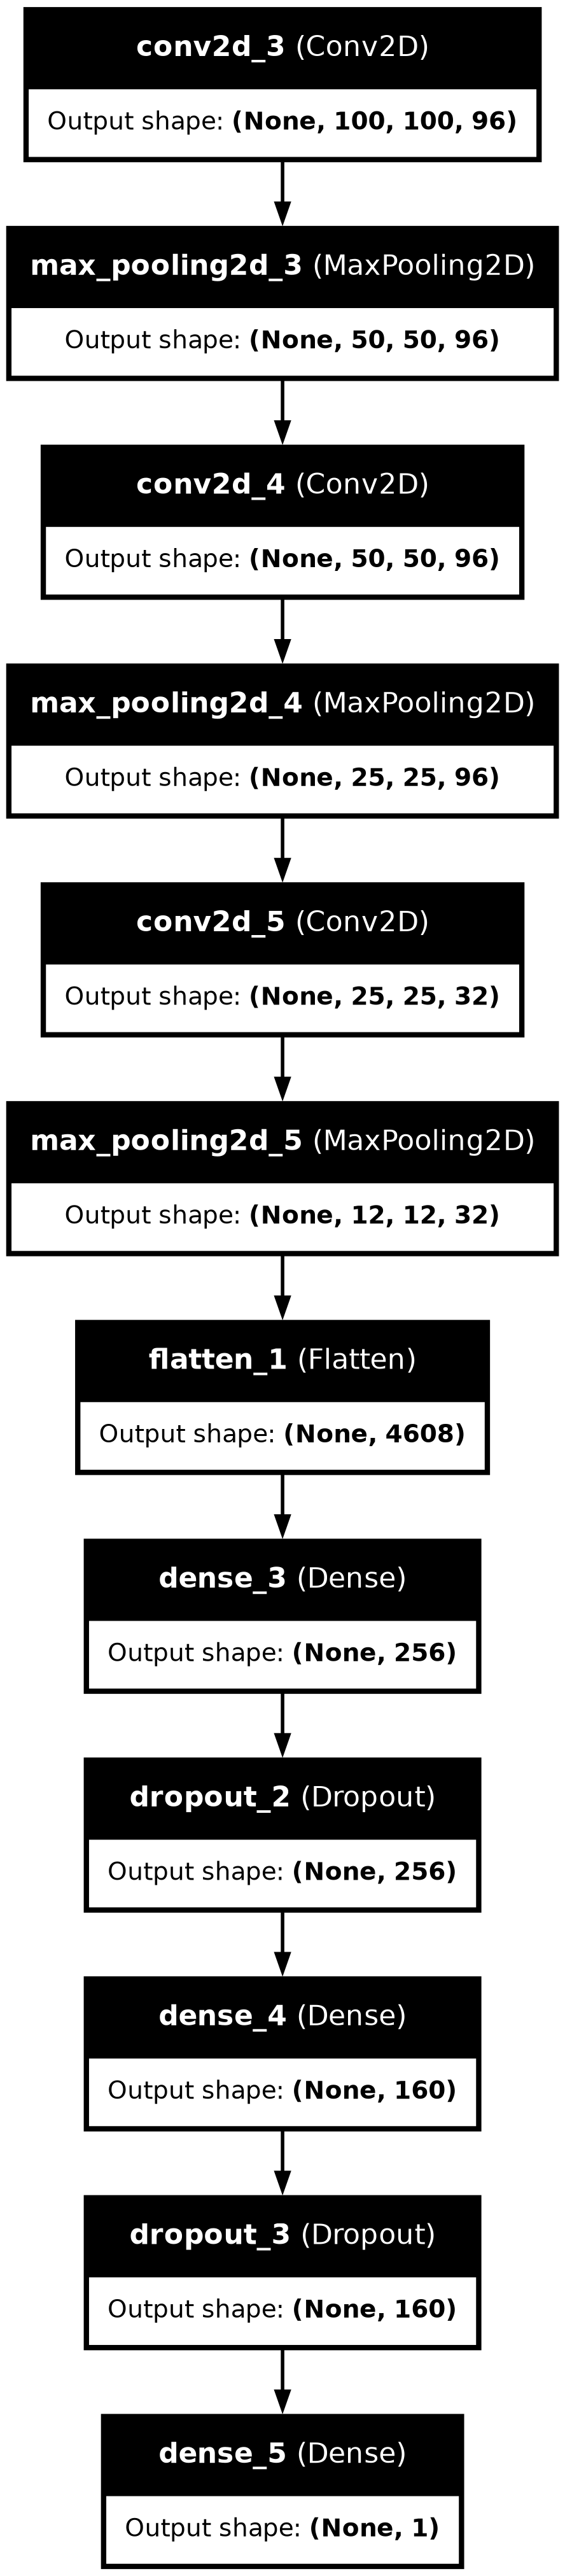

In [28]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📌 ModelPlotting:</b> Successfully plot the model
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥MODEL TRAINING BY BEST PARAMETER🔥🔥
</div>


In [29]:
# Train the model
history = model.fit(train_images, train_labels, epochs=100, validation_data=(val_images, val_labels), callbacks=[early_stopping])

Epoch 1/100
  5/173 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.5003 - loss: 0.7099

W0000 00:00:1713395888.532114      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6105 - loss: 0.6418

W0000 00:00:1713395896.603473      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713395897.403192      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 56ms/step - accuracy: 0.6109 - loss: 0.6413 - val_accuracy: 0.7678 - val_loss: 0.4503
Epoch 2/100
  7/173 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8301 - loss: 0.4180

W0000 00:00:1713395898.080534      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.7805 - loss: 0.4330 - val_accuracy: 0.7787 - val_loss: 0.3997
Epoch 3/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8169 - loss: 0.3635 - val_accuracy: 0.8549 - val_loss: 0.2575
Epoch 4/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8420 - loss: 0.3012 - val_accuracy: 0.8556 - val_loss: 0.2683
Epoch 5/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8919 - loss: 0.2258 - val_accuracy: 0.8810 - val_loss: 0.2329
Epoch 6/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8917 - loss: 0.2078 - val_accuracy: 0.8970 - val_loss: 0.2005
Epoch 7/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9220 - loss: 0.1658 - val_accuracy: 0.9122 - val_loss: 0.1743
Epoch 8/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9370 - loss: 0.1442 - val_accuracy: 0.8970 - val_loss: 0.2059
Epoch 9/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9400 - loss: 0.1299 - val_accuracy

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📌 Training:</b> Successfully train the model.
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥TRAINING GRAPH🔥🔥
</div>


In [30]:
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated", category=FutureWarning)

# Set Seaborn style
sns.set(style="whitegrid")

# Get the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥TRAINING ACCURACY GRAPH🔥🔥
</div>


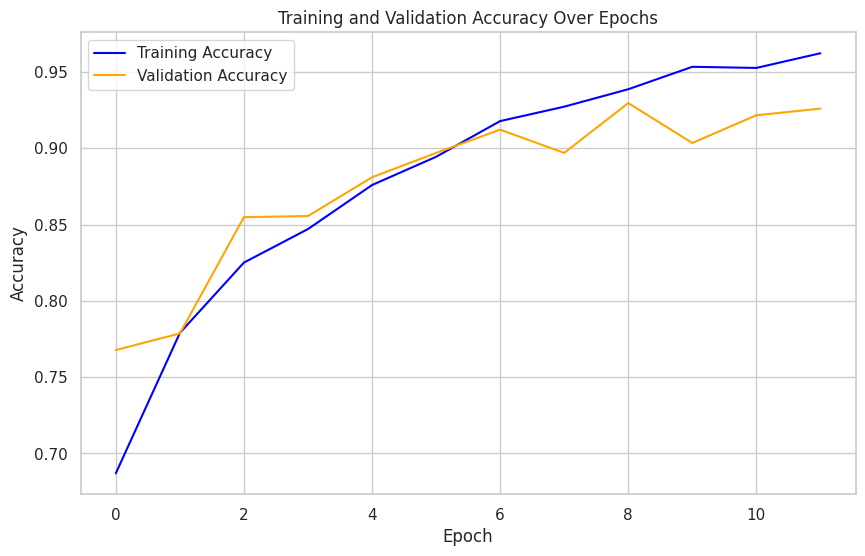

In [31]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: skyblue;">
    <b>🔍 Information:</b> <br><br>
    1. According to the above graph, we gain the training accuracy approx 95%. <br><br>
    2. Validation accuracy approx 93%. <br><br>
    3. So our model is not overfit. <br>
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥TRAINING LOSS GRAPH🔥🔥
</div>


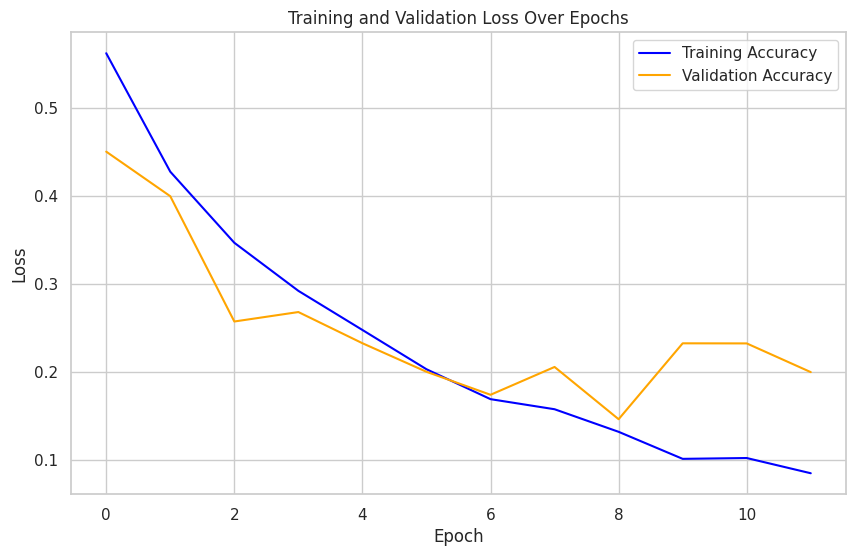

In [32]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plt.plot(history.history['loss'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_loss'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: skyblue;">
    <b>🔍 Information:</b> <br><br>
    1. According to the above graph, we gain the training loss approx 0.0996. <br><br>
    2. Validation loss approx 0.2001. <br><br>
    3. So our model is not overfit. <br>
</div>


<div style="color:white; background-color:#FF5733; padding: 15px; border-radius: 10px; font-size: 150%; font-family: Arial, sans-serif; text-align:center; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
   🔍🔍 EVALUATION ON VALIDATION DATA🔍🔍
</div>


In [33]:
# Evaluate the model on the validation data
evaluation = model.evaluate(val_images, val_labels)

# Print the evaluation results
print("Evaluation Loss:", evaluation[0])
print("Evaluation Accuracy:", evaluation[1])


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9333 - loss: 0.1440
Evaluation Loss: 0.14661060273647308
Evaluation Accuracy: 0.9296081066131592


<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: skyblue;">
    <b>🔍 Information:</b> <br><br>
    1. Evaluation accuracy approx 93%. <br><br>
    2. Evaluation loss approx 0.1466. <br>
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥CNN MODEL PREDICTION🔥🔥
</div>


In [34]:
predictions = model.predict(val_images)

for i in range(min(5, len(val_images))):
    print("Predicted class probabilities for image", i+1, ":", predictions[i])

25/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

W0000 00:00:1713395976.469661      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Predicted class probabilities for image 1 : [1.677689e-09]
Predicted class probabilities for image 2 : [8.371147e-10]
Predicted class probabilities for image 3 : [0.99330384]
Predicted class probabilities for image 4 : [0.9987422]
Predicted class probabilities for image 5 : [0.00039966]


W0000 00:00:1713395977.136362      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [35]:
predicted_labels = (predictions > 0.5).astype("int32")

for i in range(min(5, len(val_images))):
    print("Predicted label for image", i+1, ":", predicted_labels[i])


Predicted label for image 1 : [0]
Predicted label for image 2 : [0]
Predicted label for image 3 : [1]
Predicted label for image 4 : [1]
Predicted label for image 5 : [0]


In [36]:
class_mapping = {0: "Defected", 1: "Non-Defected"}
predictions = model.predict(val_images)
predicted_labels = (predictions > 0.5).astype("int32")

actual_labels = [class_mapping[label] for label in val_labels]
   
additional_data = {
    "Actual Class Name": actual_labels,
    "Predicted Class Name": [class_mapping[label] for label in predicted_labels.flatten()]
}

data = {
    "Predicted Probabilities": predictions.flatten(),  
    "Actual Labels": val_labels,
    "Predicted Labels": predicted_labels.flatten(),
    **additional_data  
}
    
df = pd.DataFrame(data)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥PREDICTED PROBABILITES DISTRIBUTION🔥🔥
</div>


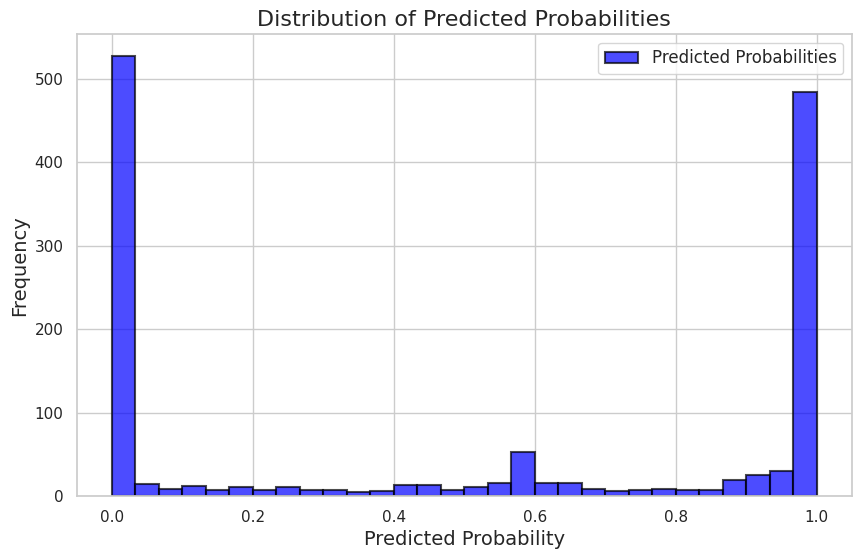

In [37]:
def plot_predicted_probabilities(predicted_probabilities):
    plt.figure(figsize=(10, 6))
    plt.hist(predicted_probabilities, bins=30, alpha=0.7, color='blue', edgecolor='black', linewidth=1.5, label='Predicted Probabilities')
    plt.xlabel('Predicted Probability', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('Distribution of Predicted Probabilities', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

plot_predicted_probabilities(predictions)


In [38]:

styled_df = df.sample(30).style.set_properties(**{'text-align': 'center'}) \
                             .set_caption("Predictions and Actual Labels") \
                             .format({"Predicted Probabilities": "{:.4f}"}) \
                             .background_gradient(cmap='viridis', subset=["Predicted Probabilities"])
styled_df

,Predicted Probabilities,Actual Labels,Predicted Labels,Actual Class Name,Predicted Class Name
1140,0.0000,0,0,Defected,Defected
330,0.4249,0,0,Defected,Defected
990,0.9996,1,1,Non-Defected,Non-Defected
1281,0.0010,0,0,Defected,Defected
804,0.9401,1,1,Non-Defected,Non-Defected
478,0.9336,1,1,Non-Defected,Non-Defected
1057,0.0013,0,0,Defected,Defected
614,0.0000,0,0,Defected,Defected
1317,0.0000,0,0,Defected,Defected
1074,0.0000,0,0,Defected,Defected


<div style="color:white; background-color:#FF5733; padding: 15px; border-radius: 10px; font-size: 150%; font-family: Arial, sans-serif; text-align:center; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
   🔍🔍 EVALUATION BY MATRICS AND GRAPHS🔍🔍
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥PREDICTION REPORT METRICS🔥🔥
</div>


Accuracy: 0.9296081277213353
Precision: 0.8955431754874652
Recall: 0.9669172932330827
F1-score: 0.9298626174981923
ROC AUC score: 0.9308639762098093
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       713
           1       0.90      0.97      0.93       665

    accuracy                           0.93      1378
   macro avg       0.93      0.93      0.93      1378
weighted avg       0.93      0.93      0.93      1378

Confusion Matrix:


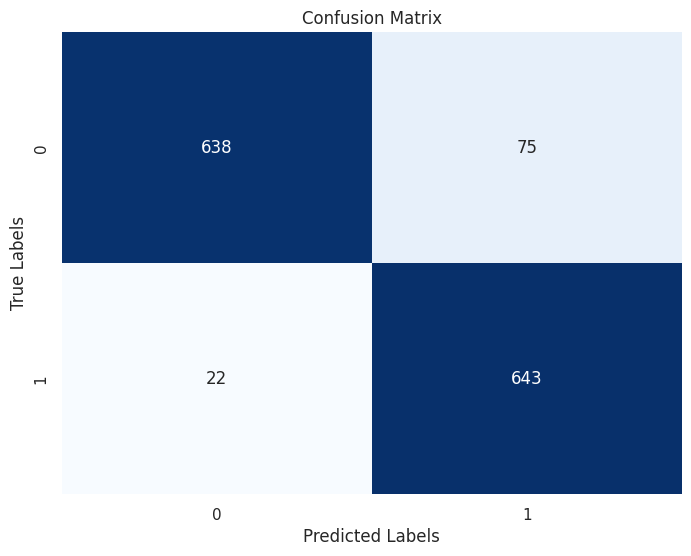

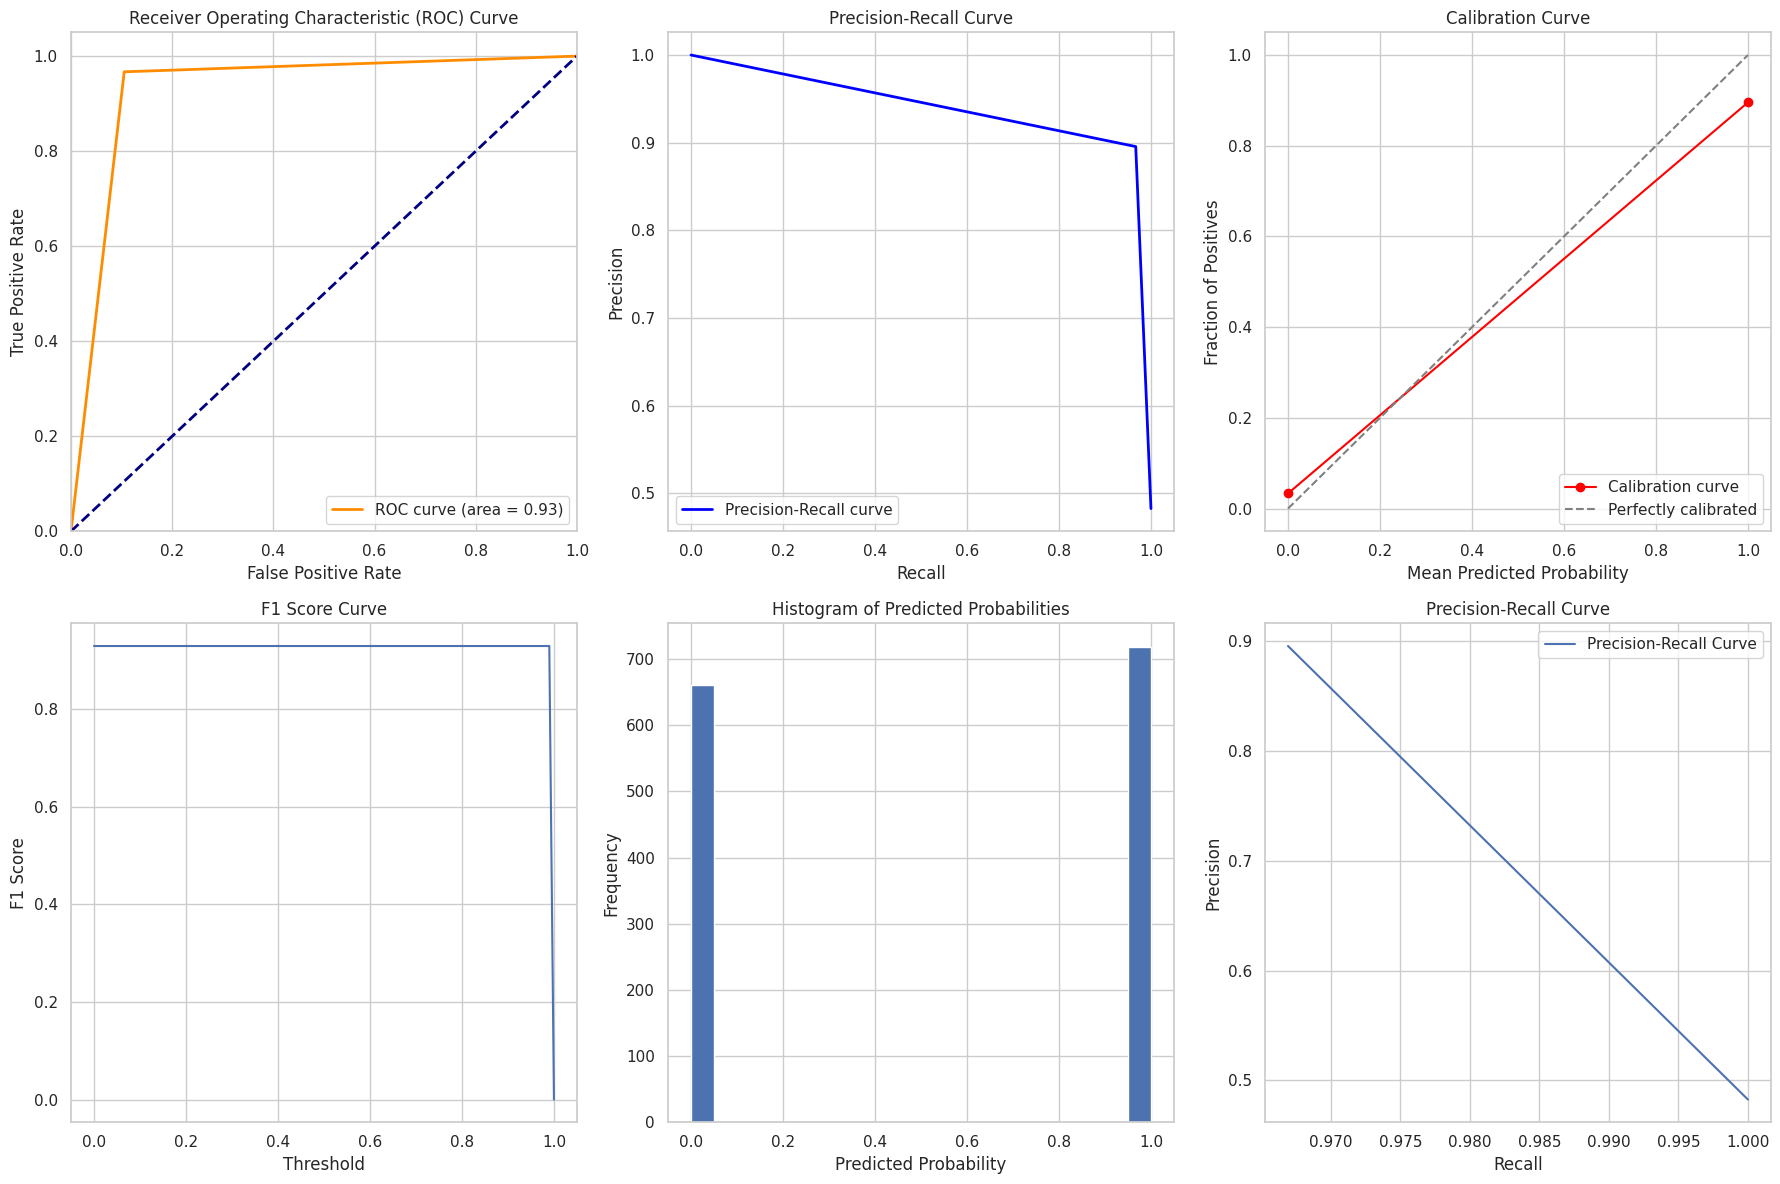

In [39]:
print("==================================================================================")
# Compute accuracy
accuracy = accuracy_score(val_labels, predicted_labels)
print("Accuracy:", accuracy)
print("==================================================================================")
# Compute precision
precision = precision_score(val_labels, predicted_labels)
print("Precision:", precision)
print("==================================================================================")
# Compute recall
recall = recall_score(val_labels, predicted_labels)
print("Recall:", recall)
print("==================================================================================")
# Compute F1-score
f1 = f1_score(val_labels, predicted_labels)
print("F1-score:", f1)
print("==================================================================================")
# Compute ROC AUC score
roc_auc = roc_auc_score(val_labels, predicted_labels)
print("ROC AUC score:", roc_auc)
# Generate classification report
print("==================================================================================")
print("Classification Report:")
print(classification_report(val_labels, predicted_labels))
print("==================================================================================")
# Generate confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(val_labels, predicted_labels)
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
print("==================================================================================")
# Set up subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Compute ROC curve
fpr, tpr, _ = roc_curve(val_labels, predicted_labels)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
axes[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axes[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 0].set_xlim([0.0, 1.0])
axes[0, 0].set_ylim([0.0, 1.05])
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0, 0].legend(loc="lower right")

# Plot precision-recall curve
precision, recall, _ = precision_recall_curve(val_labels, predicted_labels)
axes[0, 1].plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
axes[0, 1].set_xlabel('Recall')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_title('Precision-Recall Curve')
axes[0, 1].legend(loc="lower left")

# Plot calibration curve
prob_true, prob_pred = calibration_curve(val_labels, predicted_labels, n_bins=10)
axes[0, 2].plot(prob_pred, prob_true, marker='o', color='red', label='Calibration curve')
axes[0, 2].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
axes[0, 2].set_xlabel('Mean Predicted Probability')
axes[0, 2].set_ylabel('Fraction of Positives')
axes[0, 2].set_title('Calibration Curve')
axes[0, 2].legend(loc="lower right")

# Plot F1 score curve
thresholds = np.linspace(0, 1, 100)
f1_scores = [f1_score(val_labels, (predicted_labels > t).astype(int)) for t in thresholds]
axes[1, 0].plot(thresholds, f1_scores)
axes[1, 0].set_xlabel('Threshold')
axes[1, 0].set_ylabel('F1 Score')
axes[1, 0].set_title('F1 Score Curve')

# Plot histogram of predicted probabilities
axes[1, 1].hist(predicted_labels, bins=20)
axes[1, 1].set_xlabel('Predicted Probability')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Predicted Probabilities')

# Show precision-recall curve
axes[1, 2].plot(recall[:-1], precision[:-1], label="Precision-Recall Curve")
axes[1, 2].set_xlabel('Recall')
axes[1, 2].set_ylabel('Precision')
axes[1, 2].set_title('Precision-Recall Curve')
axes[1, 2].legend()

# Adjust layout
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: skyblue;">
    <b>🔍 Information:</b> <br>
    <br>
    <b>Accuracy:</b> 92.96% <br>
    <b>Precision:</b> 89.55% <br>
    <b>Recall:</b> 96.69% <br>
    <b>F1-score:</b> 92.99% <br>
    <b>ROC AUC score:</b> 93.09% <br>
    <br>
    <b>Classification Report:</b><br>
    <pre style="margin: 0; padding-left: 20px;">
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       713
           1       0.90      0.97      0.93       665

    accuracy                           0.93      1378
   macro avg       0.93      0.93      0.93      1378
weighted avg       0.93      0.93      0.93      1378
    </pre>
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥SAVING THE CNN MODEL AND WEIGHTS🔥🔥
</div>


In [40]:
model.save('/kaggle/working/saved_model.h5')
model.save('/kaggle/working/model.h5')
model_json = model.to_json()
with open("/kaggle/working/model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("/kaggle/working/model_weights.weights.h5")


<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📌 Model Saving:</b> Successfully save the best model.
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥PREDICTION ON SINGLE RANDOM IMAGE🔥🔥
</div>


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


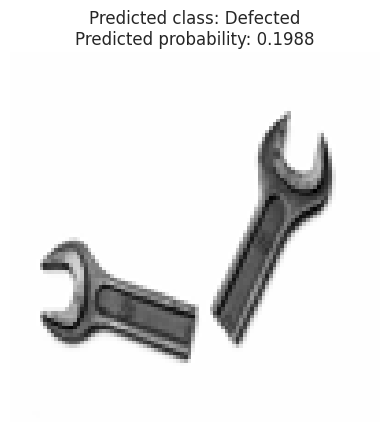

In [42]:
from PIL import Image
import numpy as np

def load_and_preprocess_image(image_path, target_size=(100, 100), grayscale=True):
    # Load image from path
    image = Image.open(image_path)
    # Resize image to target size
    image_resized = image.resize(target_size)
    # Convert image to grayscale if specified
    if grayscale:
        image_resized = image_resized.convert('L')
    # Convert image to numpy array
    image_array = np.array(image_resized)
    # Reshape array to match model's input shape
    image_array = np.expand_dims(image_array, axis=0)
    # Normalize pixel values to range [0, 1]
    image_array = image_array / 255.0
    return image_array

def predict_single_image(model, image_path, threshold=0.5):
    img = load_and_preprocess_image(image_path)
    prediction = model.predict(img)
    class_name = "Defected" if prediction < threshold else "Non-Defected"
    return img, class_name, prediction

def plot_image_with_prediction(image, class_name, prediction):     
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Predicted class: {class_name}\nPredicted probability: {prediction[0, 0]:.4f}")
    plt.axis('off')   
    plt.show()

image_path = "/kaggle/input/sample-industry-image-4/sample.jpg"
img, class_name, prediction = predict_single_image(model, image_path)
plot_image_with_prediction(img, class_name, prediction)


<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: skyblue;">
    <b>🔍 Information:</b> <br><br>
    1. Predicted class (Defected) and we see this image contain defected equipment. <br><br>
    2. Predicted probability approx 0.1988. <br>
</div>


![](https://www.seekpng.com/png/detail/279-2793078_calligraphy-fonts-thank-you.png)

* Nishant Raghuwanshi
* 4:52 AM